# Math Topics Classification Competition EDA

This notebook contains exploratory data analysis for the Kaggle competition on classifying math problems into different topics.
The goal is to analyze patterns in the data and understand the distribution of different math topics.

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go

# Set style for better visualizations
sns.set_palette("husl")

## Load and Examine the Data

In [2]:
# Read the training data
train_df = pd.read_csv('data/train.csv')

# Display basic information about the dataset
print("\nDataset Info:")
print(train_df.info())

print("\nFirst few rows of the dataset:")
print(train_df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10189 entries, 0 to 10188
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  10189 non-null  object
 1   label     10189 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 159.3+ KB
None

First few rows of the dataset:
                                            Question  label
0  A solitaire game is played as follows.  Six di...      3
1  2. The school table tennis championship was he...      5
2  Given that $x, y,$ and $z$ are real numbers th...      0
3  $25 \cdot 22$ Given three distinct points $P\l...      1
4  I am thinking of a five-digit number composed ...      5


## Distribution of Topics

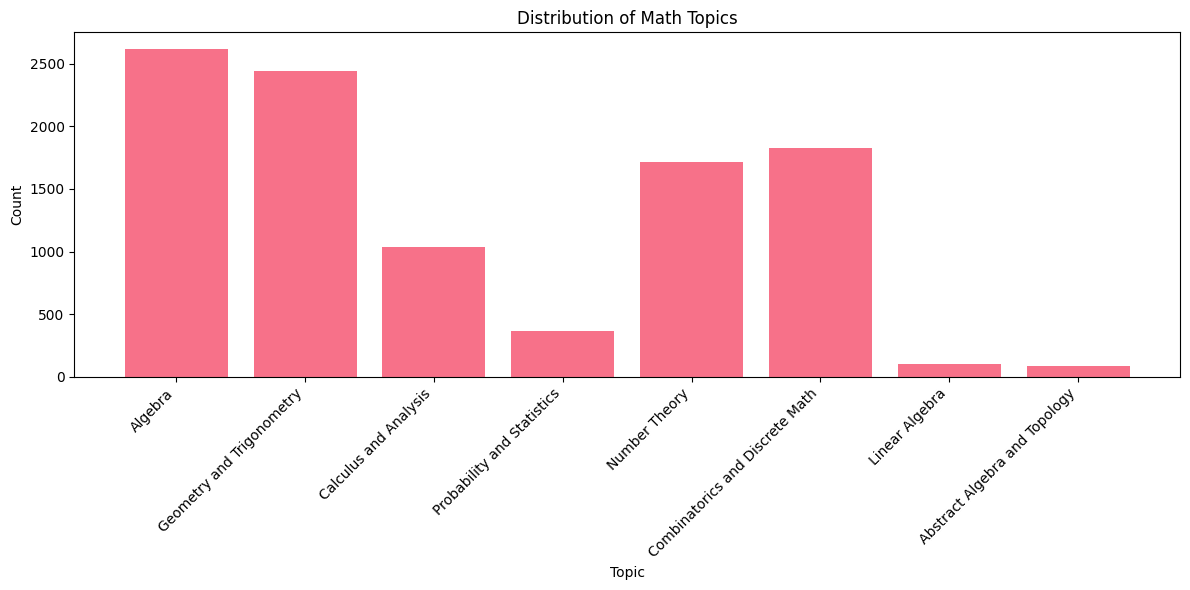

In [5]:
# Create a count plot of topics
plt.figure(figsize=(12, 6))
topic_counts = train_df['label'].value_counts().sort_index()

# Define topic names
topic_names = [
    'Algebra',
    'Geometry and Trigonometry',
    'Calculus and Analysis',
    'Probability and Statistics',
    'Number Theory',
    'Combinatorics and Discrete Math',
    'Linear Algebra',
    'Abstract Algebra and Topology'
]

# Create bar plot
plt.bar(topic_names, topic_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Math Topics')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.tight_layout()

## Text Analysis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 1.0, 'Word Cloud of Math Questions')

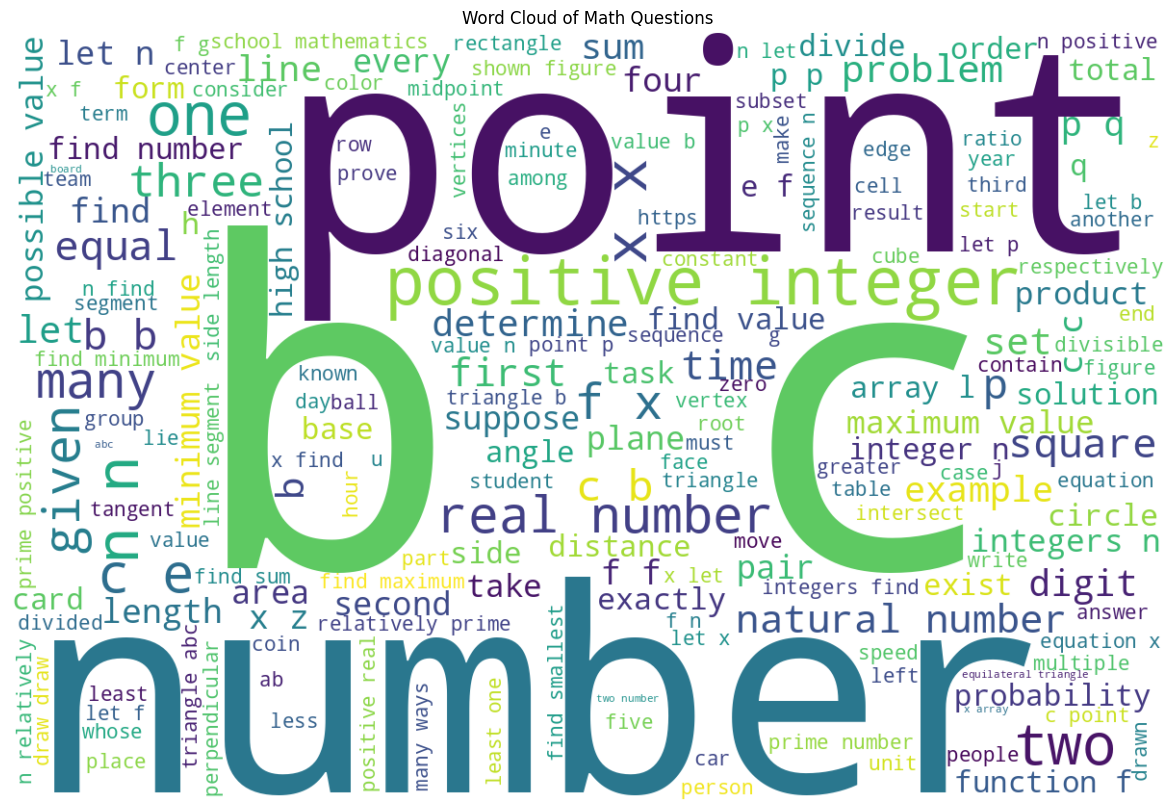

In [6]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Combine all questions into one text
all_text = ' '.join(train_df['Question'].astype(str))

# Tokenize and get word frequencies
tokens = word_tokenize(all_text.lower())
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
word_freq = Counter(filtered_tokens)

# Create word cloud
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(' '.join(filtered_tokens))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Math Questions')

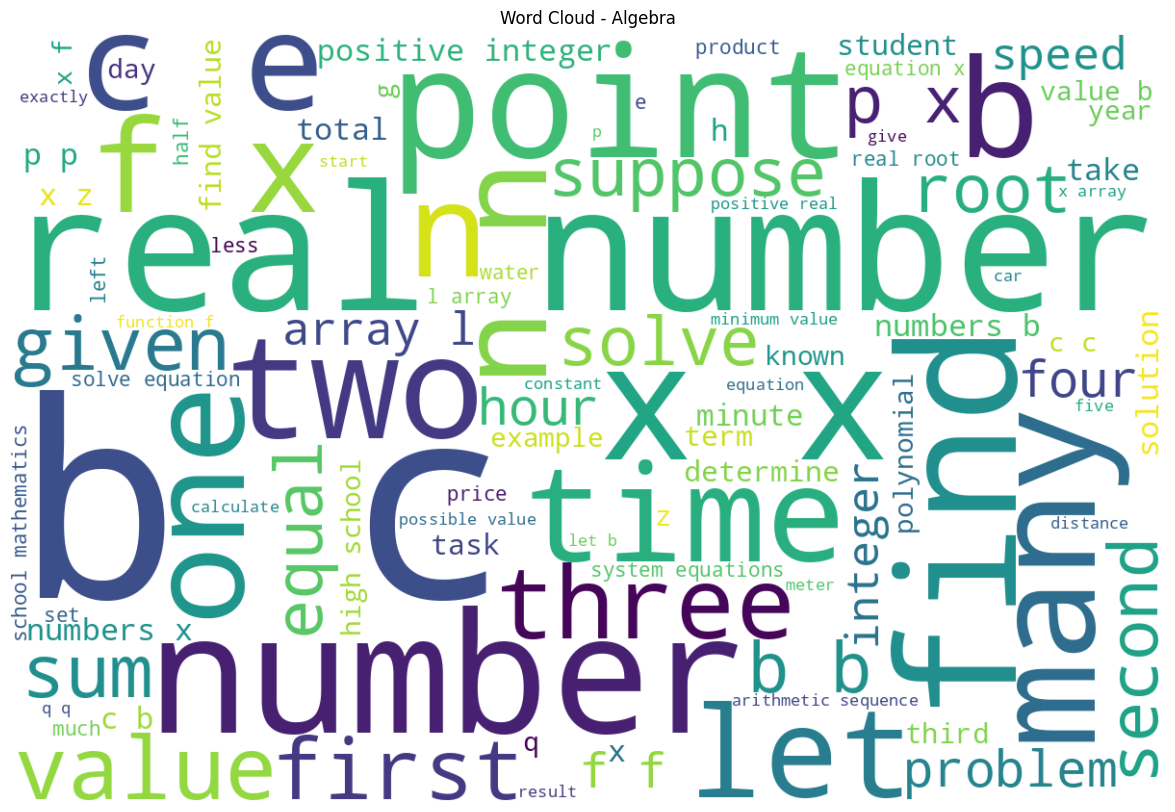

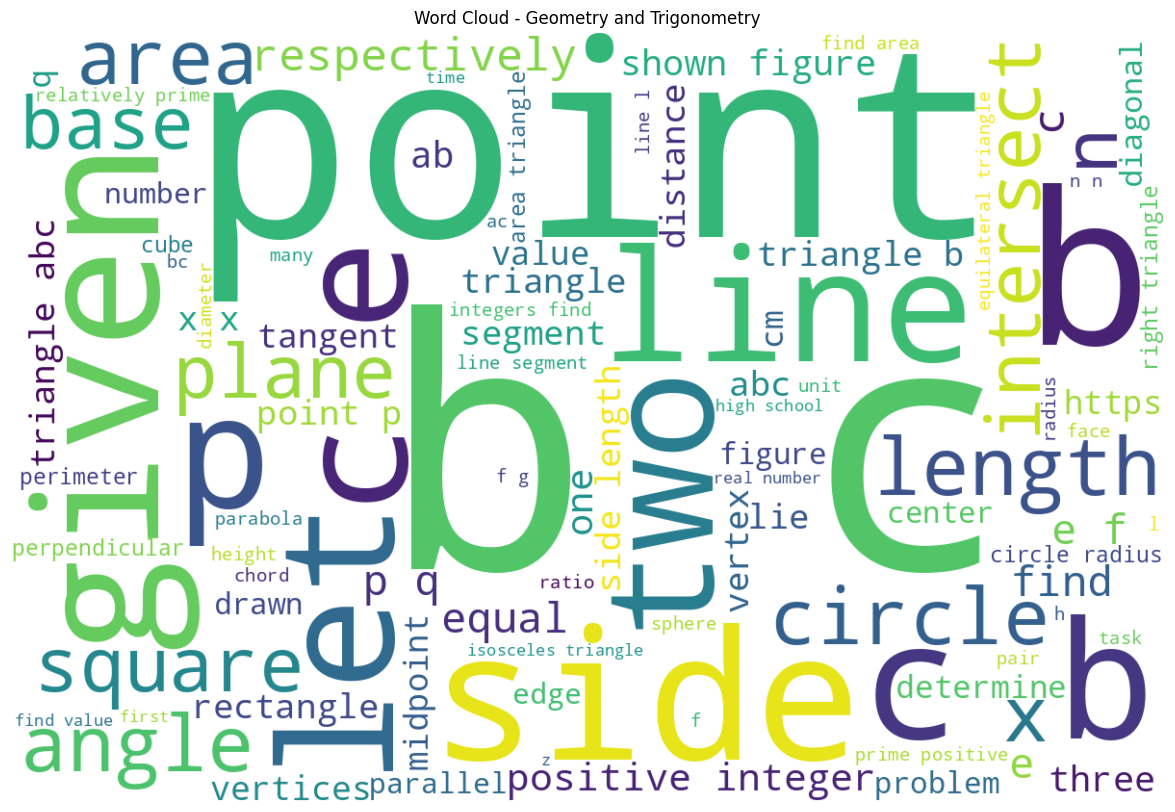

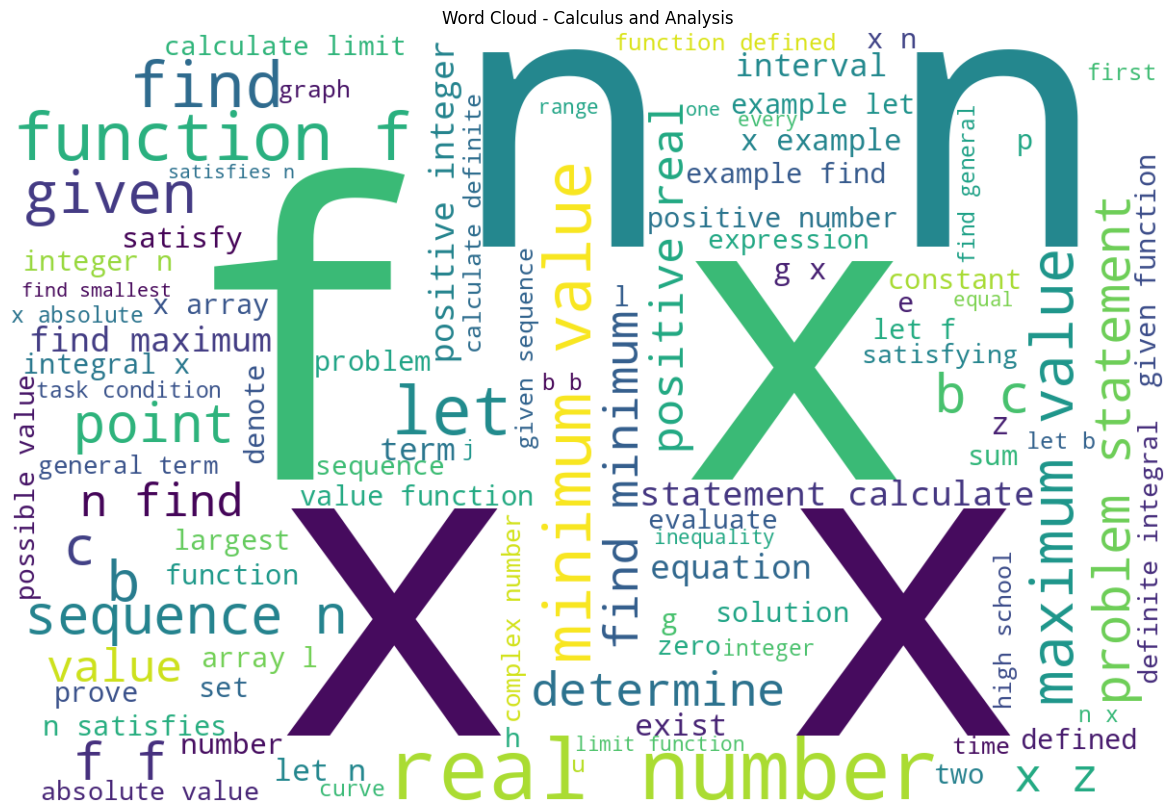

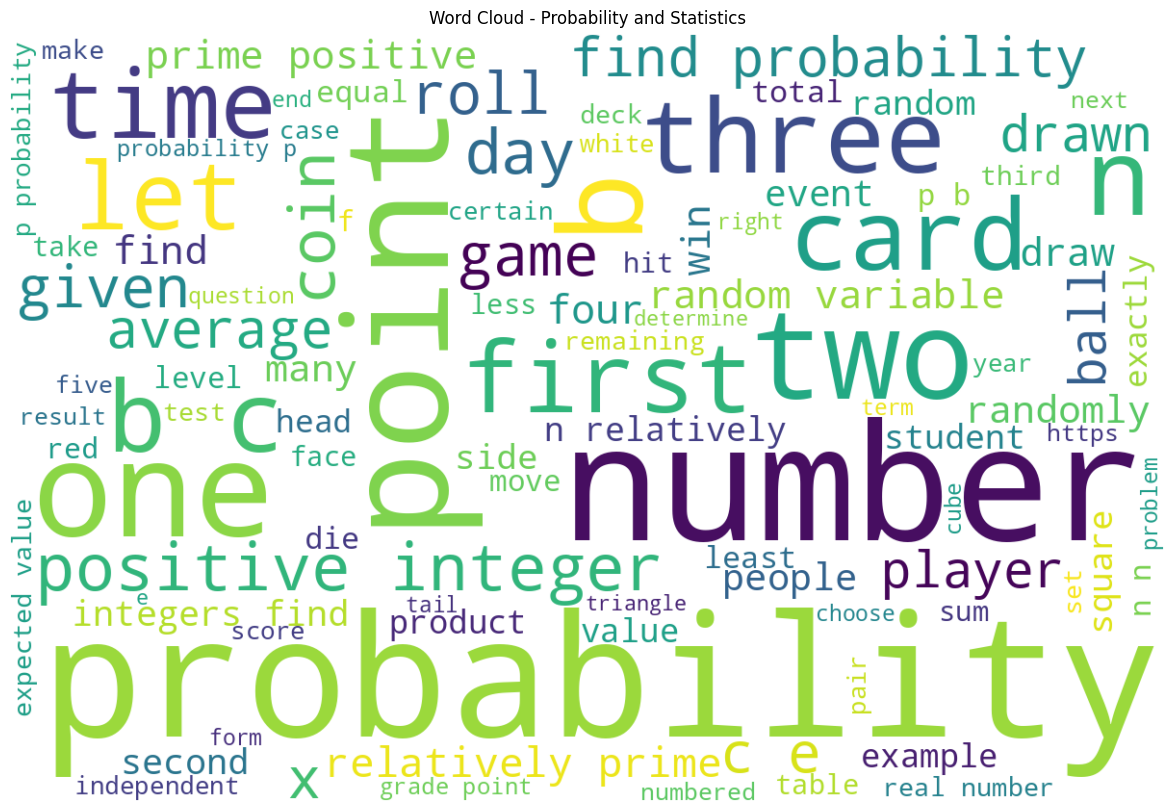

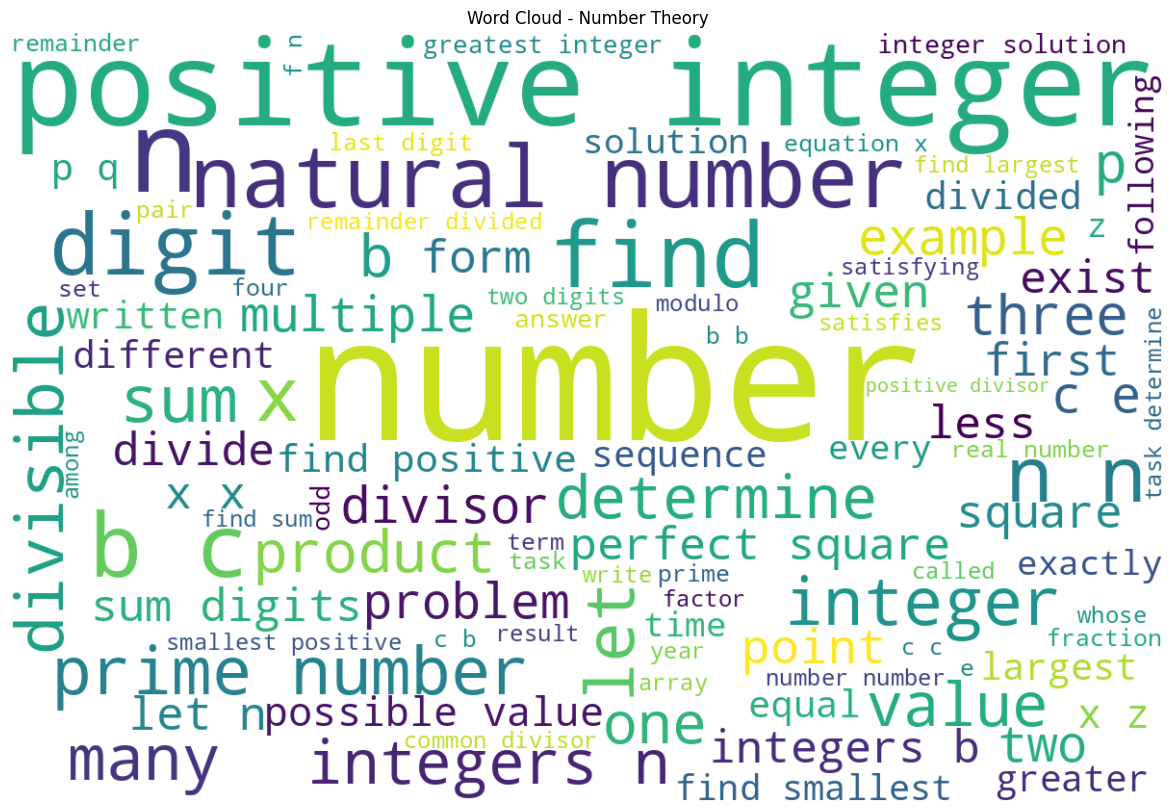

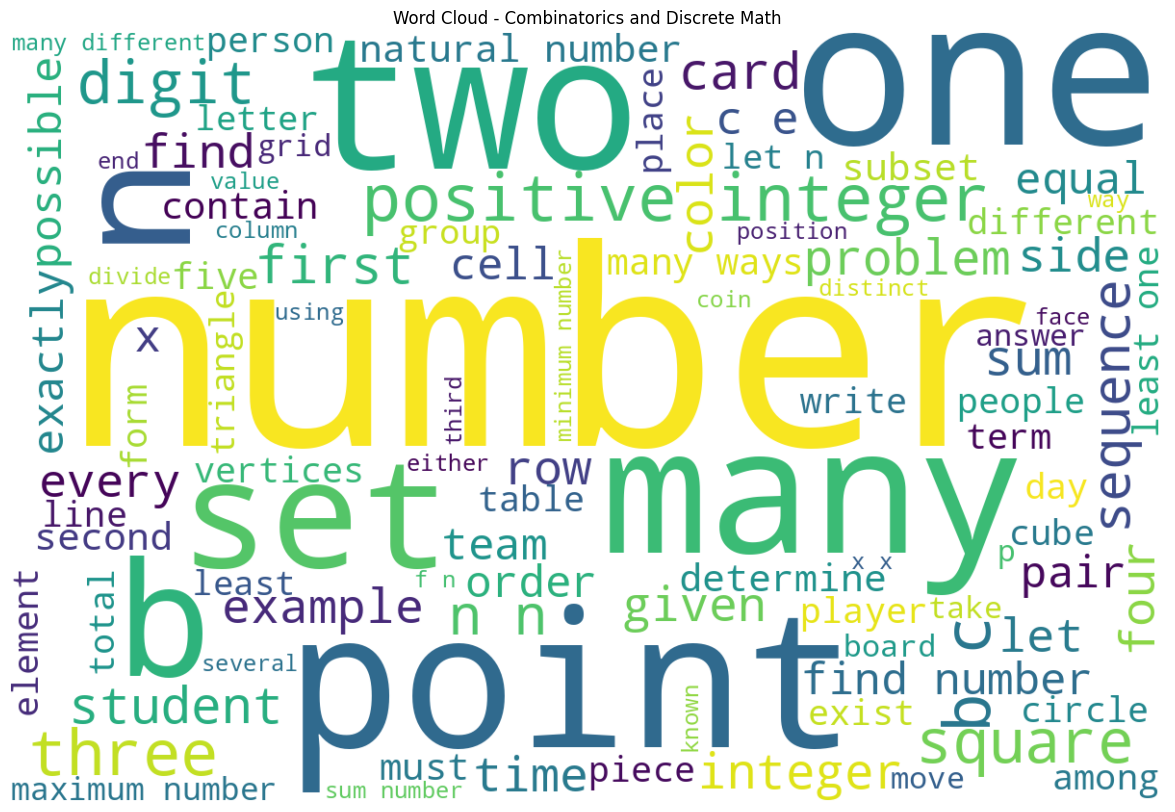

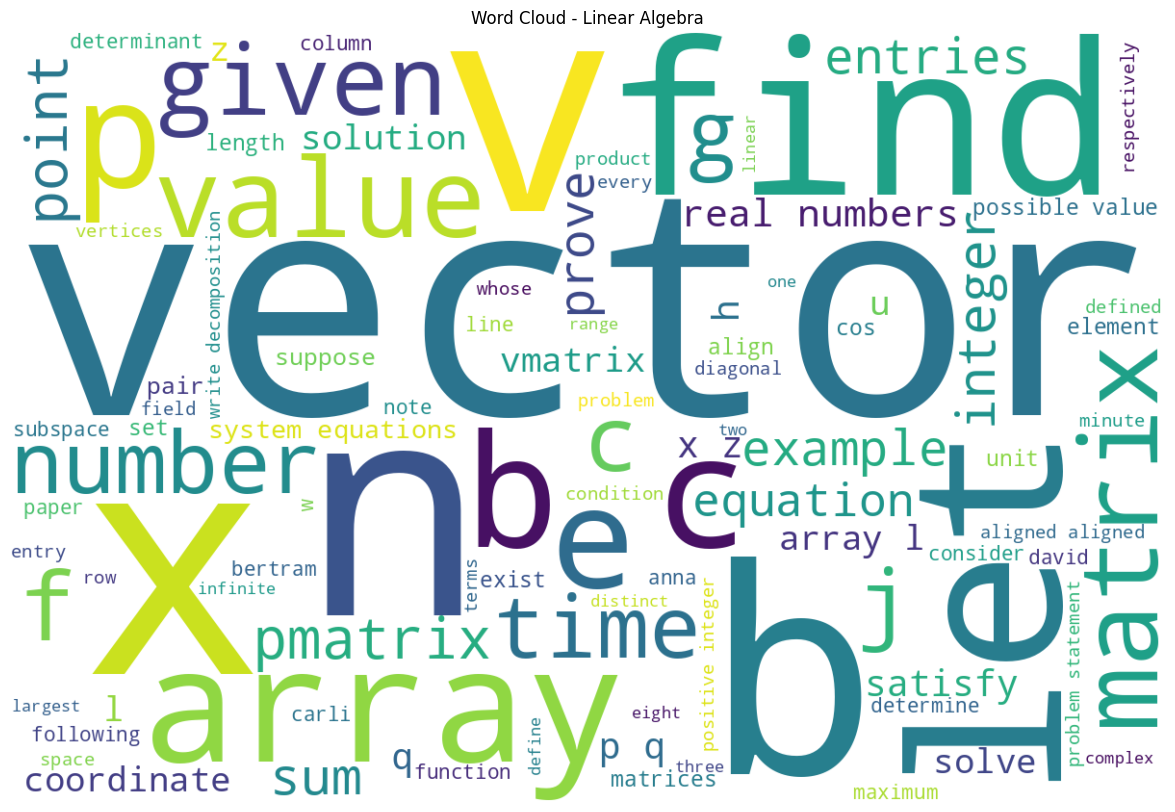

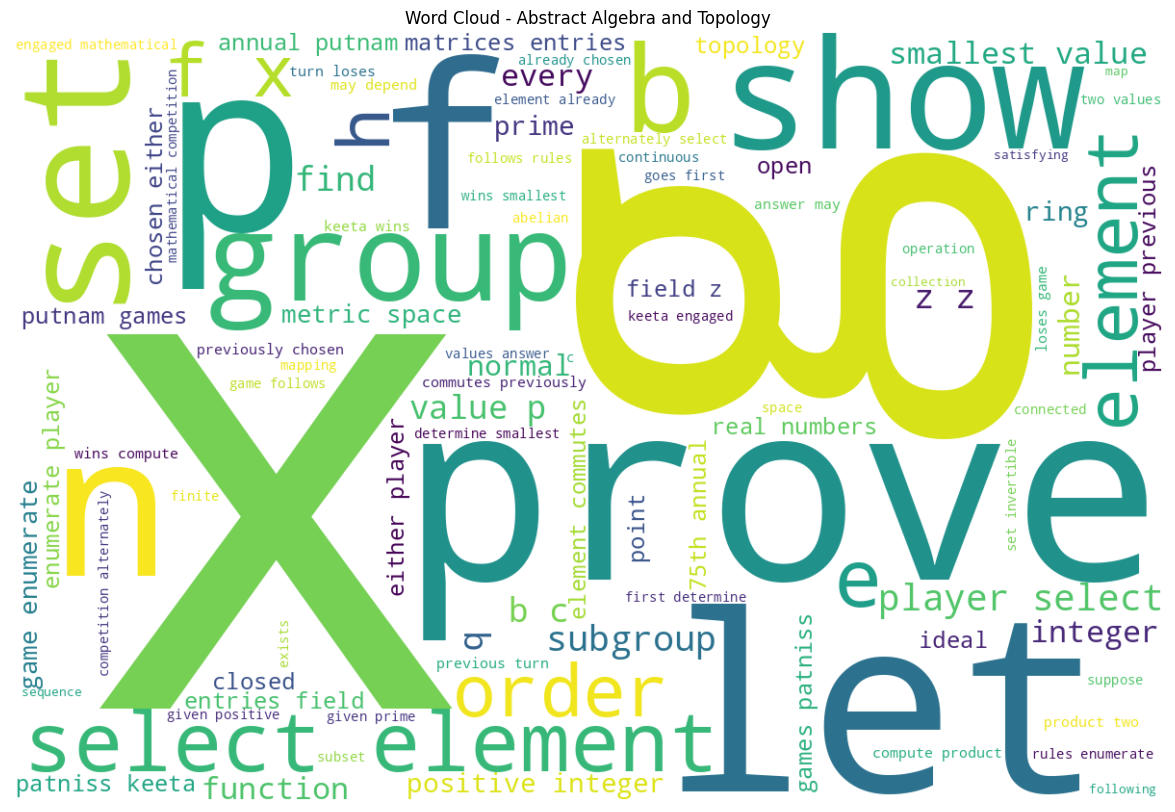

In [11]:
# Save individual word clouds
for idx, topic in enumerate(topic_names):
    # Get questions for this topic
    topic_questions = train_df[train_df['label'] == idx]['Question']
    
    # Combine all questions for this topic
    topic_text = ' '.join(topic_questions.astype(str))
    
    # Tokenize and filter
    topic_tokens = word_tokenize(topic_text.lower())
    topic_filtered_tokens = [word for word in topic_tokens if word.isalnum() and word not in stop_words]
    
    # Create word cloud for this topic
    topic_wordcloud = WordCloud(width=1200, height=800,
                              background_color='white',
                              max_words=100,
                              colormap='viridis').generate(' '.join(topic_filtered_tokens))
    
    # Save individual plot
    plt.figure(figsize=(15, 10))
    plt.imshow(topic_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {topic}')

## Question Length Analysis

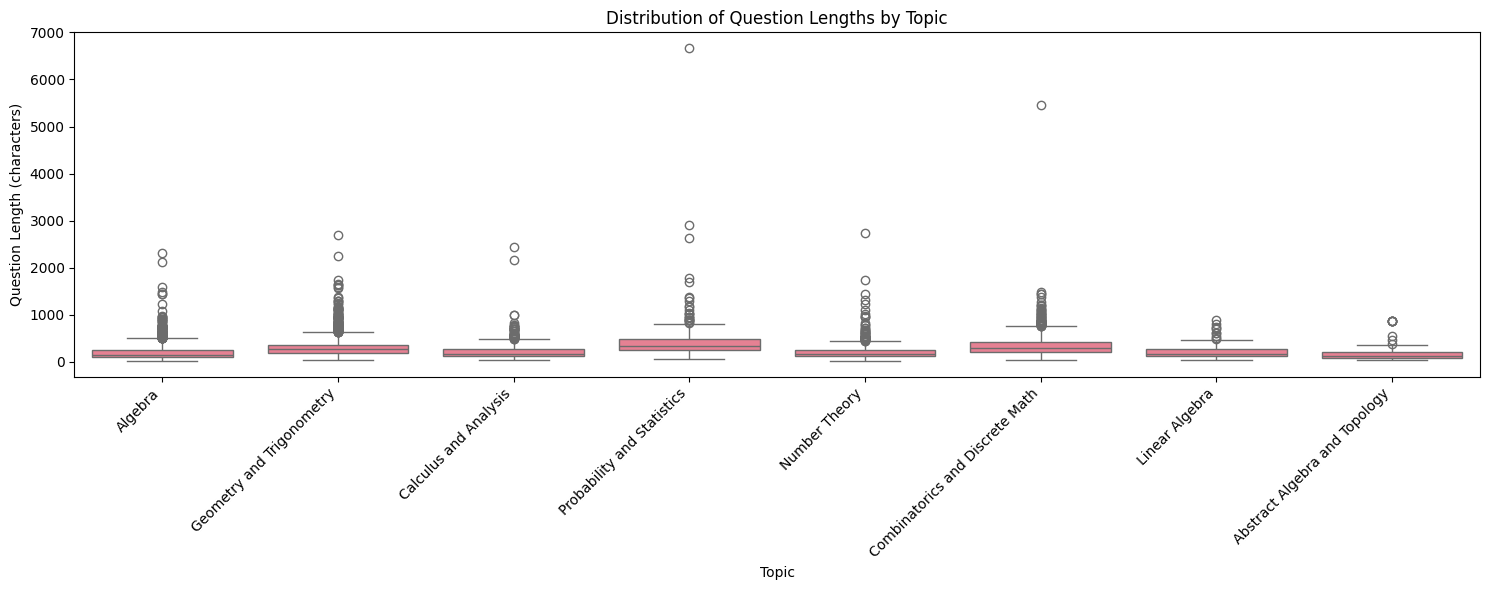

In [6]:
# Calculate question lengths
train_df['question_length'] = train_df['Question'].str.len()
train_df['question_words'] = train_df['Question'].str.split().str.len()

# Create box plot of question lengths by topic
plt.figure(figsize=(15, 6))
sns.boxplot(x='label', y='question_length', data=train_df)
plt.xticks(range(8), topic_names, rotation=45, ha='right')
plt.title('Distribution of Question Lengths by Topic')
plt.xlabel('Topic')
plt.ylabel('Question Length (characters)')
plt.tight_layout()

## Common Words by Topic

In [8]:
def get_top_words(text, n=10):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalnum() and word not in stop_words]
    return Counter(words).most_common(n)

# Get top words for each topic
top_words_by_topic = {}
for topic_idx, topic_name in enumerate(topic_names):
    topic_text = ' '.join(train_df[train_df['label'] == topic_idx]['Question'])
    top_words_by_topic[topic_name] = get_top_words(topic_text)

# Print top words for each topic
for topic, words in top_words_by_topic.items():
    print(f"\nTop 10 words in {topic}:")
    for word, count in words:
        print(f"{word}: {count}")


Top 10 words in Algebra:
2: 2535
x: 1523
b: 1403
1: 1383
3: 1278
c: 900
4: 771
5: 676
n: 647
real: 549

Top 10 words in Geometry and Trigonometry:
b: 3339
c: 2911
2: 2250
1: 1654
point: 1135
3: 1125
find: 993
e: 967
p: 915
triangle: 893

Top 10 words in Calculus and Analysis:
x: 1609
2: 1520
1: 1080
n: 933
f: 718
find: 501
3: 487
0: 475
value: 376
real: 320

Top 10 words in Probability and Statistics:
probability: 350
1: 244
b: 200
2: 199
number: 178
n: 167
one: 162
p: 136
two: 129
3: 127

Top 10 words in Number Theory:
n: 1425
2: 1052
number: 1047
1: 769
positive: 738
find: 694
b: 680
integer: 676
numbers: 612
integers: 584

Top 10 words in Combinatorics and Discrete Math:
number: 1260
1: 1236
n: 1190
2: 937
numbers: 771
b: 728
one: 651
two: 635
3: 627
many: 620

Top 10 words in Linear Algebra:
2: 157
1: 75
b: 59
x: 54
3: 52
k: 42
n: 40
c: 39
v: 39
0: 38

Top 10 words in Abstract Algebra and Topology:
x: 83
f: 48
p: 48
g: 45
prove: 41
let: 39
r: 39
2: 34
b: 32
z: 30


## Basic Statistics of Questions


Basic statistics of question lengths:
count    10189.000000
mean       262.368731
std        206.886054
min         16.000000
25%        138.000000
50%        219.000000
75%        330.000000
max       6668.000000
Name: question_length, dtype: float64


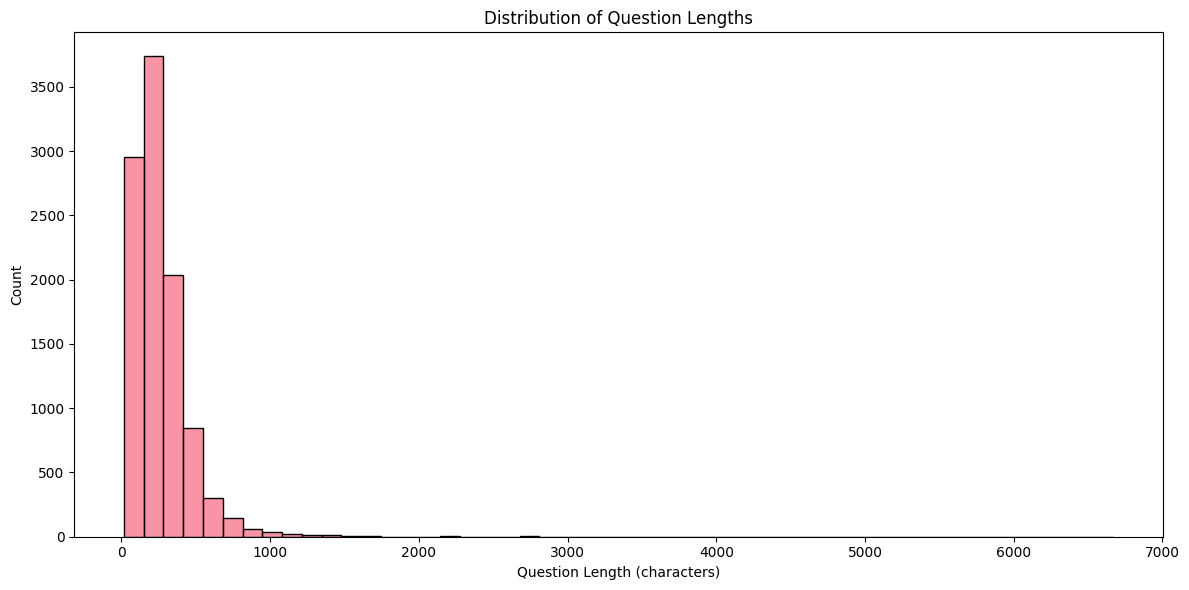

In [9]:
# Calculate basic statistics
print("\nBasic statistics of question lengths:")
print(train_df['question_length'].describe())

# Create histogram of question lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='question_length', bins=50)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length (characters)')
plt.ylabel('Count')
plt.tight_layout()


Basic statistics of question lengths:
count    10189.000000
mean        44.169791
std         33.140316
min          2.000000
25%         23.000000
50%         37.000000
75%         57.000000
max       1097.000000
Name: question_words, dtype: float64


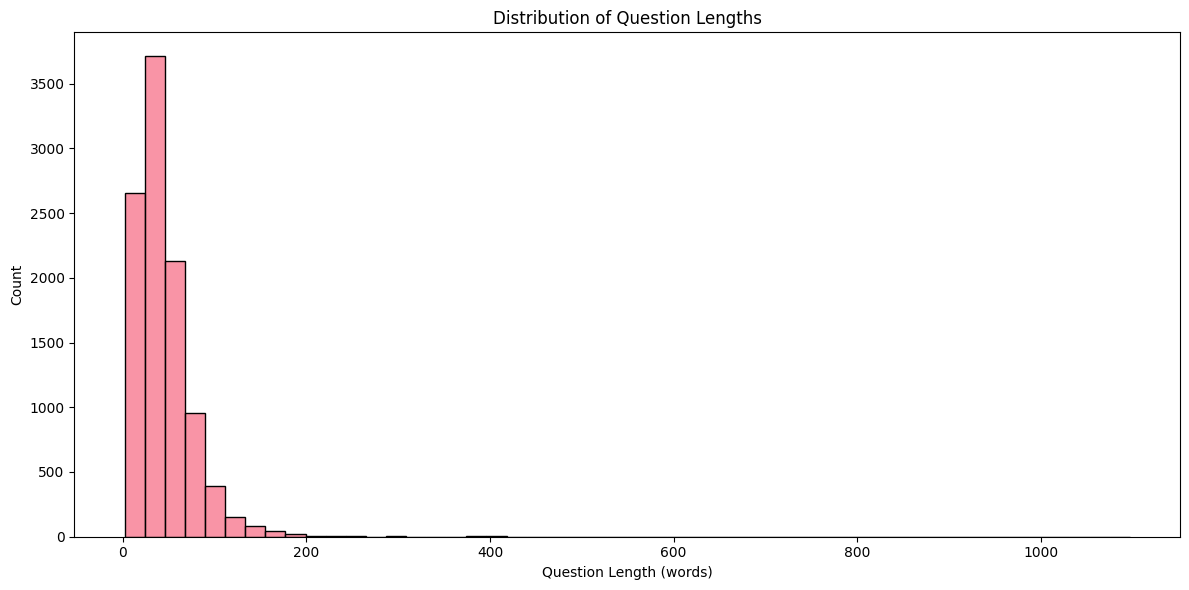

In [7]:
# Calculate basic statistics
print("\nBasic statistics of question lengths:")
print(train_df['question_words'].describe())

# Create histogram of question lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='question_words', bins=50)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length (words)')
plt.ylabel('Count')
plt.tight_layout()

## Correlation between Question Length and Topics

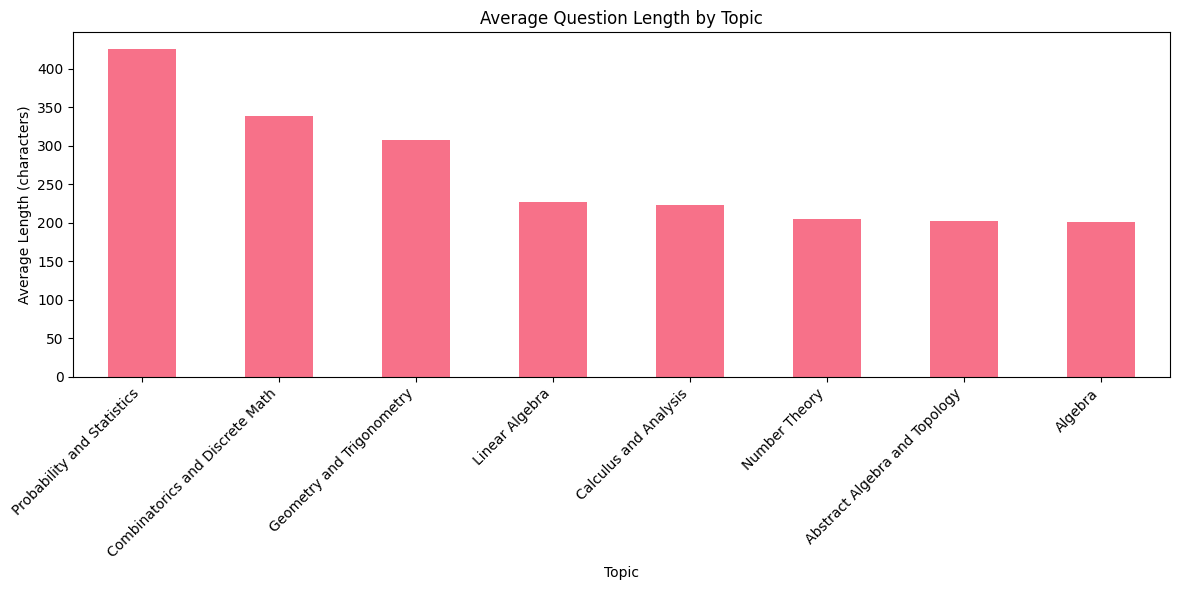

In [10]:
# Calculate average question length by topic
avg_length_by_topic = train_df.groupby('label')['question_length'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
avg_length_by_topic.plot(kind='bar')
plt.xticks(range(8), [topic_names[i] for i in avg_length_by_topic.index], rotation=45, ha='right')
plt.title('Average Question Length by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Length (characters)')
plt.tight_layout() 